# Sympy - Cálculo Simbólico en Python

J.R. Johansson (jrjohansson at gmail.com); traducción de P. Gzlez. Rodelas (prodelas at ugr.es)

La última versión en inglés de IPython notebook se puede descargar en [IPython notebook](http://ipython.org/notebook.html) así como en modo presentación en [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

El resto de notebooks de esta serie se encuentran indexados en [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Introducción

Hay dos sistemas de álgebra computacional (CAS, de Computer Algebra Systems en inglés) para Python:

* [SymPy](http://sympy.org/en/index.html) - Un módulo python que se puede usar en cualquier  programa Python, o dentro de una sesión IPython, que a su vez proporciona otras poderosas herramientas CAS.
* [Sage](http://www.sagemath.org/) - Sage es también otro poderoso entorno CAS, completamente equipado, cuyo objetivo es proporcionar un sistema de código abierto capaz de competir con Mathematica y Maple. Sin embargo Sage no se puede considerar un módulo de Python propiamente dicho, sino más bien un entorno CAS independiente que usa Python como su lenguaje programación.

Sage es en cierto sentido más potente que SymPy, pero ambos ofrecen una funcionalidad CAS bastante completa. La ventaja de SymPy es precisamente el hecho de ser un módulo regular de Python, que a su vez puede integrarse bien dentro de cualquier notebook de IPython como este.

Así pues, en esta presentación pondremos en práctica el uso del paquete SymPy dentro de notebooks IPython. Si usted también está interesado en otros entornos CAS de código abierto también estaría recomendado leer e investigar algo más sobre Sage.

Para empezar a usar SymPy en un programa o notebook de Python, deberemos empezar por importar el módulo `sympy`:

In [2]:
from sympy import *

A su vez, para obtener salidas de matemáticas en formato $\LaTeX$ ejecute también:

In [3]:
init_printing()

# con versiones más antiguas de sympy/ipython, cargar la correspondiente extensión
#%load_ext sympy.interactive.ipythonprinting
# o bien
#%load_ext sympyprinting

## Variables simbólicas

En SymPy necesitamos crear símbolos para las variables con las que queremos trabajar. Para ellos, podemos crear nuevos símbolos usando la "clase" `Symbol`:

In [4]:
x = Symbol('x')

In [5]:
(pi + x)**2

(x + pi)**2

In [6]:
# forma alternativa para crear y definir varios símbolos a la vez
a, b, c = symbols("a, b, c")

In [7]:
type(a)

sympy.core.symbol.Symbol

In [8]:
type(b)

sympy.core.symbol.Symbol

Podemos añadir condiciones, restricciones o supuestos, a estos símbolos cuando los creamos:

In [9]:
x = Symbol('x', real=True)

In [10]:
x.is_imaginary

False

In [11]:
x = Symbol('x', positive=True)

In [12]:
x > 0

True

In [13]:
x<=0

False

## Números Complejos

La unidad imaginaria se denota `I` en Sympy. 

In [14]:
1+1*I

1 + I

In [15]:
I**2

-1

In [16]:
(x * I + 1)**2

(I*x + 1)**2

### Números Racionales

Hay tres tipos diferentes de números en SymPy: `Real`, `Rational`, `Integer`: 

In [17]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [18]:
r1

4/5

In [19]:
r1+r2

41/20

In [20]:
r1/r2

16/25

##  Evaluaciones Numéricas

SymPy usa una "biblioteca" ("library" en inglés) específica para los cálculos numéricos con precisión artitraria, al mismo tiempo que posee expresiones predefinidas SymPy para cierto número de constantes matemáticas, como: `pi`, `e`, `oo` (infinito).

Para evaluar una expresión numéricamente podemos usar la función `evalf` (o `N`), que toma un argumento `n` que especifica la cantidad de dígitos significativos.

In [21]:
pi.evalf(n=100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

In [22]:
y = (x + pi)**2

In [23]:
N(y, 5) # lo mismo que con 'evalf'

(x + 3.1416)**2

Cuando evaluamos numéricamente expresiones algebraicas, a menudo necesitamos sustituir un cierto símbolo o variable con un determinado valor numérico. Con SymPy lo haremos usando la función `subs`:

In [24]:
y.subs(x, 1.5)

(1.5 + pi)**2

In [24]:
N(y.subs(x, 1.5))

In [25]:
N(y.subs(x, 1.5),100)

21.54438236185873833422242114971465978790520760536610808933818315314349404127783223888587787974490344

La función `subs` por supuesto que también puede usarse para sustituir otros Símbolos y expresiones:

In [26]:
y.subs(x, a+b)

(a + b + pi)**2

In [27]:
y.subs(x, a+pi)

(a + 2*pi)**2

También podremos combinar la evolución numérica de otras expresiones con los denominados arrays de NumPy:

In [28]:
import numpy

In [29]:
x_vec = numpy.arange(0, 10, 0.1)

In [30]:
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

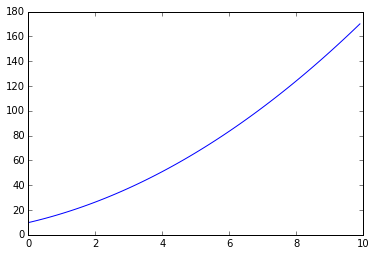

In [31]:
fig, ax = plt.subplots()
ax.plot(x_vec, y_vec);

Sin embargo, este tipo de sustitución numérica puede resultar demasiado lenta, y veremos que hay maneras mucho más eficientes de hacer esto mismo: por ejemplo podríamos usar la función `lambdify` para en cierto modo "compilar" una expresión de Sympy y convertirla en una función que será mucho más apropiada para evaluar numéricamente lo que queríamos:

In [32]:
f = lambdify([x], (x + pi)**2, 'numpy')  # el primer argumento es una lista de variables de las que
                                         # f será función: en este caso simplemente x -> f(x)

In [33]:
y_vec = f(x_vec)  # ahora podremos pasar directamente un array de numpy como argumento para que f(x) lo evalúe

El aumento de velocidad usando funciones "lambdified" en vez de evaluaciones numéricas directas puede llegar a ser significativo, a menudo de varios órdenes de magnitud. Incluso en este simple ejemplo podemos obtener una ganancia significativa en tiempo de cálculo:

In [34]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

10 loops, best of 3: 19.9 ms per loop


In [35]:
%%timeit

y_vec = f(x_vec)

The slowest run took 12.33 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.37 µs per loop


## Manipulationes Algebraicas 

Uno de los principales usos de un sistema CAS (del inglés "Computer Algebra System") es la realización de manipulaciones de tipo algebraico de distintos tipos de expresiones, ya sean simbólicas, numéricas o bien mixtas. Por ejemplo, podríamos querer expandir un producto, factorizar una expresión, o simplificarla. Los comandos (o funciones) para realizar estas operaiones básicas en SymPy se muestran en esta sección.

### Expandir y factorizar

Primeros pasos con manipulaciones algebraicas

In [36]:
(x+1)*(x+2)*(x+3)

(x + 1)*(x + 2)*(x + 3)

In [39]:
expand(_)

x**3 + 6*x**2 + 11*x + 6

In [40]:
expand((x+1)*(x+2)*(x+3))

x**3 + 6*x**2 + 11*x + 6

In [41]:
factor(_)

(x + 1)*(x + 2)*(x + 3)

El comando `expand` admite cierto número de palabras clave como argumento para poder indicar que tipo de expansiones queremos que se realicen. Por ejemplo, para expandir expresiones trigonometricas, usaremos la palabra clave `trig=True` como argumento:

In [42]:
sin(a+b)

sin(a + b)

In [43]:
expand(sin(a+b), trig=True)

sin(a)*cos(b) + sin(b)*cos(a)

Usar el comando `help(expand)` para una descripción detallada de varios tipos de expansiones que `expand` puede realizar.

In [1]:
# help(expand)

La operación contraria a la expansión de un producto algebraico es, por supuesto, la factorización. Para factorizar una expresión en SymPy usaremos `factor`: 

In [46]:
factor(x**3 + 6 * x**2 + 11*x + 6)

(x + 1)*(x + 2)*(x + 3)

### Simplificar

El comando `simplify` trata de simplificar una expresión cualquiera en otra expresión con "mejor aspecto", usando varias técnicas. No obstante, existen otras alternativas más specificas a `simplify`: `trigsimp`, `powsimp`, `logcombine`, etc. 

El uso básico de estos otros comandos es como sigue:

In [47]:
# simplify a veces expande un producto, pero no suele factorizarlo
simplify((x+1)*(x+2)*(x+3))
simplify(_)

(x + 1)*(x + 2)*(x + 3)

In [48]:
# simplify también usa identidades trigonométricas
simplify(sin(a)**2 + cos(a)**2)

1

In [49]:
simplify(cos(x)/sin(x))

1/tan(x)

### apart y together

Para manipular expresiones simbólicas con fracciones, también podemos usar los comandos `apart` y `together`:

In [50]:
f1 = 1/((a+1)*(a+2))

In [51]:
f1

1/((a + 1)*(a + 2))

In [52]:
apart(f1)

-1/(a + 2) + 1/(a + 1)

In [53]:
f2 = 1/(a+2) + 1/(a+3)

In [54]:
f2

1/(a + 3) + 1/(a + 2)

In [55]:
together(f2)

(2*a + 5)/((a + 2)*(a + 3))

Usualmente `simplify` combina fracciones pero no factoriza: 

In [56]:
simplify(f2)

(2*a + 5)/((a + 2)*(a + 3))

In [57]:
simplify(f1+f2)

2*(a + 2)/(a**2 + 4*a + 3)

## Otras operaciones de Cálculo con funciones reales de variable real

Además de manipulaciones de tipo algebraico, los otros usos esenciales de un sistema CAS son la realización de operaciones básicas del cálculo clásico, como derivadas e integrales de funciones y expresiones reales de una o varias variables reales.

### Derivación

La operación y reglas habituales de derivación son usualmente simples. Con el paquete Simpy bastará con usar la orden `diff`. El primer argumento será la expresión a la que se le realizará la derivada, y el segundo argumento es el símbolo o variable respecto de la cual se realizará la derivada:

In [58]:
y

(x + pi)**2

In [59]:
diff(y**2, x)

4*(x + pi)**3

Para realizar derivadas de orden superior podremos especificarlo de diversas maneras:

In [60]:
diff(y**2, x, x)

12*(x + pi)**2

In [61]:
diff(y**2, x, 2) # equivalente a lo anterior

12*(x + pi)**2

Para calcular la derivada de una expresión multivariada, procederemos como sigue:

In [62]:
x, y, z = symbols("x,y,z")

In [63]:
f = sin(x*y)

In [64]:
f = sin(x*y) + cos(y*z)

In [65]:
f?

Realizaremos la siguiente derivada parcial múltiple $\frac{d^3f}{dxdy^2}$

In [66]:
diff(f, x, 1, y, 2)

-x*(x*y*cos(x*y) + 2*sin(x*y))

## Integración

La integración se realiza de una manera similar:

In [67]:
f

sin(x*y) + cos(y*z)

In [68]:
integrate(f, x)

x*cos(y*z) + Piecewise((0, y == 0), (-cos(x*y)/y, True))

Proporcionando límites inferior y superior para la variable de integración podremos evaluar integrales definidas:

In [69]:
integrate(f, (x, -1, 1))

2*cos(y*z)

aunque también se pueden considerar integrales impropias

In [70]:
integrate(exp(-x**2), (x, -oo, oo))

sqrt(pi)

Recuerde que `oo` es el símbolo que SymPy tiene para denotar infinito ("inifinity" en inglés).

### Sumas y productos

Podemos evaluar sumas y productos usando las funciones: `Sum` y `Product`

In [73]:
n = Symbol("n")

In [74]:
Sum(1/n**2, (n, 1, 10))

Sum(n**(-2), (n, 1, 10))

In [75]:
Sum(1/n**2, (n,1, 10)).evalf()

1.54976773116654

In [76]:
Sum(1/n**2, (n, 1, oo)).evalf()

1.64493406684823

Los productos se calculan de la misma manera:

In [77]:
Product(n, (n, 1, 10)) # 10!

Product(n, (n, 1, 10))

In [78]:
10!

SyntaxError: invalid syntax (<ipython-input-78-ba1c6fc79113>, line 1)

## Límites

Los límites se pueden evaluar usando la función `limit`. Por ejemplo, 

In [79]:
limit(sin(x)/x, x, 0)

1

También podemos usar 'limit' para chequear el resultado de una derivación usando el comando `diff`:

In [80]:
f

sin(x*y) + cos(y*z)

In [98]:
diff(f, x)

$\displaystyle \frac{\mathrm{d}f(x,y)}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$

In [81]:
h = Symbol("h")

In [82]:
limit((f.subs(x, x+h) - f)/h, h, 0)

y*cos(x*y)

Podemos cambiar la dirección desde la que nos acercamos al punto en el que se calcula el límite usando la palabra clave `dir` como argumento:

In [83]:
limit(1/x, x, 0, dir="+")

oo

In [84]:
limit(1/x, x, 0, dir="-")

-oo

## Series

Los desarrollos en serie de potencias son otro de las herramientas más útiles del Cálculo, y resultan indispensables en cualquier sistema CAS. Con SymPy podemos obtener un desarrollo en serie de una función o expresión simbólica usando `series`:

In [85]:
series(exp(x), x)

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

Por defecto se expande la expresión alrededor del punto $x=0$, pero también podemos expandirla alrededor de cualquier otro valor de $x$ incluyéndolo explicitamente en la llamada a la función `series`:

In [86]:
series(exp(x), x, 1)

E + E*(x - 1) + E*(x - 1)**2/2 + E*(x - 1)**3/6 + E*(x - 1)**4/24 + E*(x - 1)**5/120 + O((x - 1)**6, (x, 1))

También podemos indicar explícitamente el orden del desarrollo en serie que se va a realizar:

In [87]:
series(exp(x), x, 1, 10)

E + E*(x - 1) + E*(x - 1)**2/2 + E*(x - 1)**3/6 + E*(x - 1)**4/24 + E*(x - 1)**5/120 + E*(x - 1)**6/720 + E*(x - 1)**7/5040 + E*(x - 1)**8/40320 + E*(x - 1)**9/362880 + O((x - 1)**10, (x, 1))

Los desarrollos en series incluyen por defecto el orden de la aproximación, que puede resultar muy útil para llevar un control del orden de validez de cierta fórmula o expresión cuando combinamos o realizamos algún cálculo posterior con desarrollos en serie de distinto orden:

In [88]:
s1 = cos(x).series(x, 0, 5)
s1

1 - x**2/2 + x**4/24 + O(x**5)

In [89]:
s2 = sin(x).series(x, 0, 2)
s2

x + O(x**2)

In [90]:
expand(s1 * s2)

x + O(x**2)

Si queremos deshacernos de la información relativa al orden de la aproximación podemos emplear el método `removeO`:

In [91]:
expand(s1.removeO() * s2.removeO())

x**5/24 - x**3/2 + x

Pero nótese que esta salida no es el desarrollo correcto de $\cos(x)\sin(x)$ de $5$º orden:

In [92]:
(cos(x)*sin(x)).series(x, 0, 6)

x - 2*x**3/3 + 2*x**5/15 + O(x**6)

## Álgebra  Lineal

### Matrices

Las matrices y vectores son definidos usando la clase `Matrix`:

In [93]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

In [94]:
A = Matrix([[m11, m12],[m21, m22]])
A

Matrix([
[m11, m12],
[m21, m22]])

In [95]:
b = Matrix([[b1], [b2]])
b

Matrix([
[b1],
[b2]])

Con "instancias" de esta clase `Matrix` podremos efectuar las operaciones usuales de álgebra matricial:

In [96]:
A**2

Matrix([
[ m11**2 + m12*m21, m11*m12 + m12*m22],
[m11*m21 + m21*m22,  m12*m21 + m22**2]])

In [97]:
A * b

Matrix([
[b1*m11 + b2*m12],
[b1*m21 + b2*m22]])

Así como calcular determinantes e inversas:

In [98]:
A.det()

m11*m22 - m12*m21

In [99]:
A.inv()

Matrix([
[1/m11 + m12*m21/(m11**2*(m22 - m12*m21/m11)), -m12/(m11*(m22 - m12*m21/m11))],
[              -m21/(m11*(m22 - m12*m21/m11)),          1/(m22 - m12*m21/m11)]])

## Resolviendo ecuaciones

Para resolver ecuaciones y sistemas de ecuaciones podemos usar `solve`:

In [100]:
solve(x**2 - 1, x)

[-1, 1]

In [101]:
solve(x**4 - x**2 - 1, x)

[-I*sqrt(-1/2 + sqrt(5)/2),
 I*sqrt(-1/2 + sqrt(5)/2),
 -sqrt(1/2 + sqrt(5)/2),
 sqrt(1/2 + sqrt(5)/2)]

Sistemas de ecuaciones:

In [102]:
solve([x + y - 1, x - y - 1], [x,y])

{x: 1, y: 0}

In terms of other symbolic expressions:

In [103]:
solve([x + y - a, x - y - c], [x,y])

{x: a/2 + c/2, y: a/2 - c/2}

## Lecturas Adicionales

* http://sympy.org/en/index.html - Página web del proyecto SymPy.
* https://github.com/sympy/sympy - Código fuente del paquete SymPy.
* http://live.sympy.org - Version Online de SymPy para tests y demostraciones.

## Versiones

In [105]:
%reload_ext version_information

%version_information numpy, matplotlib, sympy

Software versions
Python 2.7.12 64bit [MSC v.1500 64 bit (AMD64)]
IPython 4.1.2
OS Windows 7 6.1.7601 SP1
numpy 1.9.2
matplotlib 1.4.3
sympy 0.7.6
Mon Feb 06 01:14:14 2017 Hora estándar romance